# 3.3	Datenqualität und Normalisierung des OCR-Korpus

## 1. Bibliotheken

In [1]:
import pandas as pd
import difflib
import numpy as np
import matplotlib.pyplot as plt

## 2. Funktionen

In [2]:
def preprocessing_custom(df, column_inputText, newColumnName):
    """
    Uses a dataframe and preprocesses the text in the given column.
    Step 1: replace some chars
    ("\n", " "), ("- ",""), (" -",""), ("-",""), ("''",""), (",,",""), ("„",""), ("ſ", "s"), ("é","e"),
    ("è","e"),("á","a"), ("à","a"), ("⸗-",""), ("⸗ und"," und"), ("⸗ "," "), (" ⸗"," "), ("⸗",""), ("- "," "), ("-",""), (" -"," "),
    ("#"," "), ("⸗\n",""), ("-\n","")
    Step 2: lower all chars in column
    Step 3: remove all punctuation
    Step 4: remove lone letters and additional whitespace
    The following libaries are needed:
    pandas as pd
    """
    #replace some chars
    df[newColumnName] = df[column_inputText].str.replace("-\n","")
    df[newColumnName] = df[newColumnName].str.replace("- "," ")
    df[newColumnName] = df[newColumnName].str.replace(" -"," ")
    df[newColumnName] = df[newColumnName].str.replace("-","")
    df[newColumnName] = df[newColumnName].str.replace("⸗ und"," und")
    df[newColumnName] = df[newColumnName].str.replace("⸗ "," ")
    df[newColumnName] = df[newColumnName].str.replace(" ⸗","")
    df[newColumnName] = df[newColumnName].str.replace("⸗\n","")
    df[newColumnName] = df[newColumnName].str.replace("⸗","")
    df[newColumnName] = df[newColumnName].str.replace("#"," ")
    df[newColumnName] = df[newColumnName].str.replace("\n", " ")
    df[newColumnName] = df[newColumnName].str.replace("'","")
    df[newColumnName] = df[newColumnName].str.replace('"',"")
    df[newColumnName] = df[newColumnName].str.replace(",,","")
    df[newColumnName] = df[newColumnName].str.replace("„","")
    df[newColumnName] = df[newColumnName].str.replace("ſ", "s")
    df[newColumnName] = df[newColumnName].str.replace("é","e")
    df[newColumnName] = df[newColumnName].str.replace("è","e")
    df[newColumnName] = df[newColumnName].str.replace("á","a")
    df[newColumnName] = df[newColumnName].str.replace("à","a")
    
    #lower all words
    df[newColumnName] = df[newColumnName].str.lower()
    # remove all punctuation
    df[newColumnName] = df[newColumnName].str.replace('[^\w\s]','')
    # remove lone letters and additional whitespace
    df[newColumnName] = df[newColumnName].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
    return df

In [3]:
def difflib_ratio(df, columnname1, columnname2, identifier):
    """
    Iterates through columnname 1 and columnname2 in pandas dataframe (df) and compares both values with 
    difflib.ratio. It returns a dictionary where the key is built by iterating trough column 'identifier' and value 
    is the calculated ratio.
    The following libraries are needed:
    numpy as np
    pandas as pd
    difflib
    """
    diff_ratio = {}
    n = np.nan

    for i in range(0, df.shape[0]): # Dataframe.shape returs the rows and columns of a dataframe
        if pd.notnull(df.iloc[i][columnname1]) == True: # start with difflib if columnname 1 has data in it
            # creates ratio with SequenceMatcher of difflab library
            ratio = difflib.SequenceMatcher(None, df[columnname1][i], df[columnname2][i]).ratio() 
            diff_ratio[df[identifier][i]] = ratio

        else:
            diff_ratio[df[identifier][i]] = n # if columnname1 has no data in it just write n in the column

    return diff_ratio

In [4]:
def flatten_list(listInlist):
    return [x for xs in listInlist for x in xs]

## 3. Datenimport

- OCR Datenset aus Notebook 3.1.
- Goldstandard Datenset aus Notebook 3.2.

In [5]:
df_ground_truth = pd.read_csv("../output/3.2_korpus_analysen_ground_truth/ground_truth.csv")
#we don't need all the columns, just the text
df_ground_truth = df_ground_truth[["identifier", "ground_truth_text"]]

In [6]:
df_ground_truth.tail()

,identifier,ground_truth_text
1076,aze_19171111_11_OFFER_75,Pelzmaschin-\nnäherinnen\nwerden dringend gesu...
1077,aze_19180616_11_OFFER_90,Diener\nwird aufgenommen. Schuhfabrik\nLeopold...
1078,aze_19141018_16_OFFER_12,Frau oder Fräulein\ngesetzten Alters findet al...
1079,aze_19180616_11_OFFER_84,Weibliche Hilfskraft\nwird für Kriegsgemüsegar...
1080,aze_19171111_11_OFFER_61,Tüchtige Bildhauer\nwerden sofort aufgenommen....


#### Dataframe mit der bereits bearbeiten OCR (OCR.csv)

In [7]:
df_ocr = pd.read_csv("../output/3.1_korpus_analysen_ocr/ocr.csv")
df_ocr = df_ocr[["identifier", "region_class", "pub_id", "pub_name", "date", "OCR_text"]]

In [8]:
df_ocr.head()

,identifier,region_class,pub_id,pub_name,date,OCR_text
0,ptb_19300406_20_SEARCH_0,SEARCH,ptb,Prager Tagblatt,1930,"Junger Mann\naus der Kolonalwarenbranche,\nnac..."
1,ptb_19300406_20_SEARCH_1,SEARCH,ptb,Prager Tagblatt,1930,"21jähriger Beamter,\n\nmilitärfrei, in ekündig..."
2,ptb_19300406_20_SEARCH_2,SEARCH,ptb,Prager Tagblatt,1930,Bilanzbuchhalter\nmit Lansskirr. Praxis in der...
3,ptb_19300406_20_SEARCH_3,SEARCH,ptb,Prager Tagblatt,1930,"Techniker,\n\n24 Jahre, militärfrei. Abſolvent..."
4,ptb_19300406_20_SEARCH_4,SEARCH,ptb,Prager Tagblatt,1930,"Jüngerer Kontoriſt,\n19 Jahre, Deutſch, elwas ..."


#### Vereinung von df_ground_truth und df_OCR mit einem Inner Join 
Die Gegenüberstellung des OCR mit der Ground Truth benötigt nur Zeilen, welche beide Texte enthalten. Aus diesem Grund kann ein inner Join verwendet werden. 
Lediglich OCR-Zeilen mit einem äquivalenten Transkript werden ausgewählt für diesen Join.

In [9]:
df_ocr_ground_truth = pd.merge(df_ocr, df_ground_truth, on="identifier")
df_ocr_ground_truth.head(10)

,identifier,region_class,pub_id,pub_name,date,OCR_text,ground_truth_text
0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,"Kutſcher\n\n7 d. —b um s\nI. Bachgaſſe 1,\n\n \n","Kutscher\npolizeilich geprüft, bittet um Poste..."
1,aze_19130917_12_OFFER_1,OFFER,aze,Arbeiter-Zeitung,1913,Einige jüngere\n\nUust-Girter\n\nfinden danern...,Einige jüngere\nLuster-Gürter\nfinden dauernde...
2,aze_19130917_12_OFFER_2,OFFER,aze,Arbeiter-Zeitung,1913,Lehrmädchen\näum Kleidermachen wird aufgenomme...,Lehrmädchen\nzum Kleidermachen wird aufgenomme...
3,aze_19130917_12_OFFER_3,OFFER,aze,Arbeiter-Zeitung,1913,Schneid erinnen E\n\nAusferti an und Kettlerin...,Schneiderinnen 1111\nAusfertigerinnen und Kett...
4,aze_19130917_12_OFFER_4,OFFER,aze,Arbeiter-Zeitung,1913,Als Wäſcherin\noder Bedienerin ſucht eine Frau...,Als Wäscherin\noder Bedienerin sucht eine Frau...
5,aze_19130917_12_OFFER_5,OFFER,aze,Arbeiter-Zeitung,1913,2% 2\nTüchtige Monteure\nwerden von Wiener Mot...,Tüchtige Monteure\nwerden von Wiener Motorenfa...
6,aze_19130917_12_OFFER_6,OFFER,aze,Arbeiter-Zeitung,1913,Tüchtige Näherinnen\n\nfür Herrenhemden in und...,Tüchtige Näherinnen\nfür Herrenhemden in und a...
7,aze_19130917_12_OFFER_7,OFFER,aze,Arbeiter-Zeitung,1913,Kleidermacherin\nwatart\n2 .Hernas\nàà\n,"Kleidermacherin\ntüchtig, wird aufgenommen und..."
8,aze_19130917_12_OFFER_8,OFFER,aze,Arbeiter-Zeitung,1913,\n\nLederſchürfer oder Schärserin\n\nwird nch...,Lederschärfer oder Schärferin\nwird aufgenomme...
9,aze_19130917_12_OFFER_9,OFFER,aze,Arbeiter-Zeitung,1913,Lehrmädchen\nund Lehrfränlein werden für einen...,Lehrmädchen\nund Lehrfräulein werden für einen...


In [10]:
len(df_ocr_ground_truth)

1076

#### Alle Zeilen ohne Inhalt in "ground_truth_text" müssen gelöscht werden. Wir brauchen nur Zeilen, die eine Ground Truth entgegengestellt bekommen haben. 

In [11]:
#replace all empty strings with np.nan
df_ocr_ground_truth_nan = df_ocr_ground_truth
df_ocr_ground_truth_nan.replace("", np.nan, inplace=True)
#double check if all rows do not contain any nan-values
df_ocr_ground_truth_nan.dropna()

,identifier,region_class,pub_id,pub_name,date,OCR_text,ground_truth_text
0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,"Kutſcher\n\n7 d. —b um s\nI. Bachgaſſe 1,\n\n \n","Kutscher\npolizeilich geprüft, bittet um Poste..."
1,aze_19130917_12_OFFER_1,OFFER,aze,Arbeiter-Zeitung,1913,Einige jüngere\n\nUust-Girter\n\nfinden danern...,Einige jüngere\nLuster-Gürter\nfinden dauernde...
2,aze_19130917_12_OFFER_2,OFFER,aze,Arbeiter-Zeitung,1913,Lehrmädchen\näum Kleidermachen wird aufgenomme...,Lehrmädchen\nzum Kleidermachen wird aufgenomme...
3,aze_19130917_12_OFFER_3,OFFER,aze,Arbeiter-Zeitung,1913,Schneid erinnen E\n\nAusferti an und Kettlerin...,Schneiderinnen 1111\nAusfertigerinnen und Kett...
4,aze_19130917_12_OFFER_4,OFFER,aze,Arbeiter-Zeitung,1913,Als Wäſcherin\noder Bedienerin ſucht eine Frau...,Als Wäscherin\noder Bedienerin sucht eine Frau...
...,...,...,...,...,...,...,...
1071,vtl_19041113_12_SEARCH_4,SEARCH,vtl,Das Vaterland,1904,Um Poſten als\nWirtſchafterin\noder Wäſcheverw...,Um Poſten als\nWirtſchafterin\noder Wäſcheverw...
1072,vtl_19041113_12_SEARCH_5,SEARCH,vtl,Das Vaterland,1904,"Tüchtige, gewiſſenhafte, in\nallem Häuslichen ...","Tüchtige, gewiſſenhafte, in\nallem Häuslichen ..."
1073,vtl_19041113_12_SEARCH_6,SEARCH,vtl,Das Vaterland,1904,"Alleinſtehende Frau\n25 Jahre alt, in allen Ha...","Alleinſtehende Frau\n25 Jahre alt, in allen Ha..."
1074,vtl_19041113_12_SEARCH_7,SEARCH,vtl,Das Vaterland,1904,"#le.\nReiſebegleiterin,\n\nGefellſchafterin\no...","Als.\nReiſebegleiterin,\nGefellſchafterin\node..."


In [12]:
len(df_ocr_ground_truth)

1076

In [13]:
len(df_ocr_ground_truth_nan)

1076

#### Um dieselben Voraussetzungen zu schaffen, werden nun der Goldstandard-Korpus, sowie die OCR anhand derselben Regeln vorverarbeitet.
Alle Leerzeichen, Sonderzeichen, Zeilenumbrüche und Punktuation werden entfernt. 
Anschließend werden die Zeichen der jeweiligen Texte abgeglichen und ein Score, welcher die Ähnlichkeit darstellt, berechnet. Der Wert kann zwischen 0-1 liegen, wobei 1 die volle Übereinstimmung darstellt. 

## 4. Text Normalisierungen, um Vergleichbarkeit möglich zu machen


### 4.1. Preprocessing/Normalisierung von OCR und dem Goldstandard
Die selben Normalisierungen wurden bei dem OCR-Korpus und dem Goldstandard-Korpus durchgeführt und in eine neue Spalte gespeichert. 
Hierfür wird die Funktion "preprocessing_custom" verwendet

In [14]:
preprocessing_custom(df_ocr_ground_truth_nan, "ground_truth_text", "ground_truth_normalized")
preprocessing_custom(df_ocr_ground_truth_nan, "OCR_text", "OCR_normalized")
df_ocr_ground_truth_nan.head(1)

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5498/3396197279.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  df[newColumnName] = df[newColumnName].str.replace('[^\w\s]','')
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5498/3396197279.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
  df[newColumnName] = df[newColumnName].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5498/3396197279.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  df[newColumnName] = df[newColumnName].str.replace('[^\w\s]','')
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5498/3396197279.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
  df[newColumnName] = df[newColumnName].str.replace(r'\b\w\b', '').str.r

,identifier,region_class,pub_id,pub_name,date,OCR_text,ground_truth_text,ground_truth_normalized,OCR_normalized
0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,"Kutſcher\n\n7 d. —b um s\nI. Bachgaſſe 1,\n\n \n","Kutscher\npolizeilich geprüft, bittet um Poste...",kutscher polizeilich geprüft bittet um posten ...,kutscher um bachgasse


## 5. Ähnlichkeitswert mit difflib.ratio( )

#### Ein Ähnlichkeitswert wird mit difflib.ratio( ) erstellt für alle Zeilen, die Text in der Spalte "OCR-normalized" enthalten

- OCR_normalized not NaN  
    - save it in 'dict_ratio_ocr'

In [15]:
dict_ratio_ocr = difflib_ratio(df_ocr_ground_truth_nan, 'OCR_normalized', 'ground_truth_normalized', "identifier")

In [16]:
dict_ratio_ground_truth = difflib_ratio(df_ocr_ground_truth_nan, 'ground_truth_normalized', 'OCR_normalized', "identifier")

#### Fusionierung von ratio_dict in df_ratio

In [17]:
#create one dataframe with ratios

# ratioOCR_dict to df_ratioOCR
df_ratio_ocr = pd.DataFrame(list(dict_ratio_ocr.items()),columns = ["identifier", "ratio_OCR_ground_truth"])
df_ratio_ground_truth = pd.DataFrame(list(dict_ratio_ground_truth.items()),columns = ["identifier", "ratio_ground_truth_OCR"])

# merge the dataframes to on df_ratio
df_ratio = pd.merge(df_ocr_ground_truth_nan, df_ratio_ocr, on="identifier")
df_ratio = pd.merge(df_ratio, df_ratio_ground_truth, on="identifier")


In [18]:
df_ratio.head(20)

,identifier,region_class,pub_id,pub_name,date,OCR_text,ground_truth_text,ground_truth_normalized,OCR_normalized,ratio_OCR_ground_truth,ratio_ground_truth_OCR
0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,"Kutſcher\n\n7 d. —b um s\nI. Bachgaſſe 1,\n\n \n","Kutscher\npolizeilich geprüft, bittet um Poste...",kutscher polizeilich geprüft bittet um posten ...,kutscher um bachgasse,0.483516,0.483516
1,aze_19130917_12_OFFER_1,OFFER,aze,Arbeiter-Zeitung,1913,Einige jüngere\n\nUust-Girter\n\nfinden danern...,Einige jüngere\nLuster-Gürter\nfinden dauernde...,einige jüngere lustergürter finden dauernde be...,einige jüngere uustgirter finden danernde besc...,0.902256,0.902256
2,aze_19130917_12_OFFER_2,OFFER,aze,Arbeiter-Zeitung,1913,Lehrmädchen\näum Kleidermachen wird aufgenomme...,Lehrmädchen\nzum Kleidermachen wird aufgenomme...,lehrmädchen zum kleidermachen wird aufgenommen...,lehrmädchen äum kleidermachen wird aufgenommen...,0.923913,0.923913
3,aze_19130917_12_OFFER_3,OFFER,aze,Arbeiter-Zeitung,1913,Schneid erinnen E\n\nAusferti an und Kettlerin...,Schneiderinnen 1111\nAusfertigerinnen und Kett...,schneiderinnen 1111 ausfertigerinnen und kettl...,schneid erinnen ausferti an und kettlerinnen w...,0.937238,0.937238
4,aze_19130917_12_OFFER_4,OFFER,aze,Arbeiter-Zeitung,1913,Als Wäſcherin\noder Bedienerin ſucht eine Frau...,Als Wäscherin\noder Bedienerin sucht eine Frau...,als wäscherin oder bedienerin sucht eine frau ...,als wäscherin oder bedienerin sucht eine frau ...,1.000000,1.000000
5,aze_19130917_12_OFFER_5,OFFER,aze,Arbeiter-Zeitung,1913,2% 2\nTüchtige Monteure\nwerden von Wiener Mot...,Tüchtige Monteure\nwerden von Wiener Motorenfa...,tüchtige monteure werden von wiener motorenfab...,tüchtige monteure werden von wiener motorenfa...,0.997375,0.997375
6,aze_19130917_12_OFFER_6,OFFER,aze,Arbeiter-Zeitung,1913,Tüchtige Näherinnen\n\nfür Herrenhemden in und...,Tüchtige Näherinnen\nfür Herrenhemden in und a...,tüchtige näherinnen für herrenhemden in und au...,tüchtige näherinnen für herrenhemden in und au...,0.992958,0.992958
7,aze_19130917_12_OFFER_7,OFFER,aze,Arbeiter-Zeitung,1913,Kleidermacherin\nwatart\n2 .Hernas\nàà\n,"Kleidermacherin\ntüchtig, wird aufgenommen und...",kleidermacherin tüchtig wird aufgenommen und d...,kleidermacherin watart hernas aa,0.440000,0.413333
8,aze_19130917_12_OFFER_8,OFFER,aze,Arbeiter-Zeitung,1913,\n\nLederſchürfer oder Schärserin\n\nwird nch...,Lederschärfer oder Schärferin\nwird aufgenomme...,lederschärfer oder schärferin wird aufgenommen...,lederschürfer oder schärserin wird nchumen fr...,0.857143,0.857143
9,aze_19130917_12_OFFER_9,OFFER,aze,Arbeiter-Zeitung,1913,Lehrmädchen\nund Lehrfränlein werden für einen...,Lehrmädchen\nund Lehrfräulein werden für einen...,lehrmädchen und lehrfräulein werden für einen ...,lehrmädchen und lehrfränlein werden für einen ...,0.990741,0.990741


## 6. Symmetrischer Vergleich 

Ziel ist herauszufinden, welche Buchstaben schlecht übernommen werden können. Dies ist für diese Arbeit nicht besonders relevant. Allerdings kann vor einer inhaltlichen Textanalyse diese Datensammlung verwendet werden, um das OCR besser zu vorverarbeiten

In [19]:
# symmetric difference between OCR and ground_truth
dict_symdiff = {}
# all elements that are in `ground_truth_text` but not in `OCR_normalized`
dict_diff_ground_truth = {}
# all elements that are in `OCR_normalized`but not in `ground_truth_text`
dict_diff_ocr = {}

n = np.nan

for i in range(0, df_ratio.shape[0]):
    ocr = df_ratio.iloc[i]['OCR_normalized']
    ground_truth = df_ratio.iloc[i]['ground_truth_normalized']
    
    if pd.notnull(df_ratio.iloc[i]['OCR_normalized']) == True: # there has to be a transkription

        symdiff = set(char for char in ocr) ^ set(char for char in ground_truth) # detect the symmetric difference

        diff_ground_truth = set(ground_truth).difference(set(ocr)) # detect the different characters
        diff_ocr = set(ocr).difference(set(ground_truth)) # detect the different characters

        dict_symdiff[df_ratio["identifier"][i]] = symdiff
        dict_diff_ground_truth[df_ratio["identifier"][i]] = diff_ground_truth
        dict_diff_ocr[df_ratio["identifier"][i]] = diff_ocr

    else:
        dict_symdiff[df_ratio["identifier"][i]] = n #insert nan 
        dict_diff_ground_truth[df_ratio["identifier"][i]] = n
        dict_diff_ocr[df_ratio["identifier"][i]] = n

In [20]:
# Export der Ergebnisse in einen Dataframe
df_diff_ground_truth = pd.DataFrame(list(dict_diff_ground_truth.items()),columns = ["identifier", "in ground_truth but not in OCR"])
df_symdiff = pd.DataFrame(list(dict_symdiff.items()),columns = ["identifier", "symmetric difference in char"])
df_setdiff = pd.merge(df_diff_ground_truth, df_symdiff, on="identifier")

df_diff_ocr = pd.DataFrame(list(dict_diff_ocr.items()),columns = ["identifier", "in OCR but not in ground_truth"])
df_setdiff = pd.merge(df_setdiff, df_diff_ocr, on="identifier")

In [21]:
df_setdiff.head(10)

,identifier,in ground_truth but not in OCR,symmetric difference in char,in OCR but not in ground_truth
0,aze_19130917_12_SEARCH_0,"{2, v, n, i, 0, 6, 7, o, x, l, z, p, f, ü}","{2, o, x, p, f, ü, v, n, i, 0, 6, 7, l, z}",{}
1,aze_19130917_12_OFFER_1,"{8, 0, 5, 7, p}","{p, 8, 0, 5, 7}",{}
2,aze_19130917_12_OFFER_2,{z},{z},{}
3,aze_19130917_12_OFFER_3,{},{},{}
4,aze_19130917_12_OFFER_4,{},{},{}
5,aze_19130917_12_OFFER_5,{},{},{}
6,aze_19130917_12_OFFER_6,{},{},{}
7,aze_19130917_12_OFFER_7,"{2, v, ä, 9, b, f, ß, 0, g, 7, o, x, u, p, 1, ü}","{2, g, o, x, p, f, ü, v, ä, 9, b, ß, 0, 7, u, 1}",{}
8,aze_19130917_12_OFFER_8,"{9, z, 6}","{ü, 9, 6, z}",{ü}
9,aze_19130917_12_OFFER_9,{},{},{}


In [22]:
df_ratio["ground_truth_normalized"].iloc[1]

'einige jüngere lustergürter finden dauernde beschäftigung genaue offerte nebst lohnansprüchen an die lusterfabrik in brünn josefstadt nr 8507 '

In [23]:
df_ratio["OCR_normalized"].iloc[1]

'einige jüngere uustgirter finden danernde beschäftigung genaue offerte nebst lan an die lusterfabrik in brünn josesstadt nr '

#### Merge der Files df_ratio und df_setdiff

In [24]:
df_master = pd.merge(df_ratio, df_setdiff, on="identifier")
df_master.head(1)

,identifier,region_class,pub_id,pub_name,date,OCR_text,ground_truth_text,ground_truth_normalized,OCR_normalized,ratio_OCR_ground_truth,ratio_ground_truth_OCR,in ground_truth but not in OCR,symmetric difference in char,in OCR but not in ground_truth
0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,"Kutſcher\n\n7 d. —b um s\nI. Bachgaſſe 1,\n\n \n","Kutscher\npolizeilich geprüft, bittet um Poste...",kutscher polizeilich geprüft bittet um posten ...,kutscher um bachgasse,0.483516,0.483516,"{2, v, n, i, 0, 6, 7, o, x, l, z, p, f, ü}","{2, o, x, p, f, ü, v, n, i, 0, 6, 7, l, z}",{}


In [25]:
# check columns with ratio = 0 to find if any mistakes appeared
check = df_master[df_master["ratio_OCR_ground_truth"]==0]

In [26]:
check

,identifier,region_class,pub_id,pub_name,date,OCR_text,ground_truth_text,ground_truth_normalized,OCR_normalized,ratio_OCR_ground_truth,ratio_ground_truth_OCR,in ground_truth but not in OCR,symmetric difference in char,in OCR but not in ground_truth


no mistakes appeared

## 7. Ratios im Vergleich

In [27]:
avg_ratio_ocr_ground_truth = df_master["ratio_OCR_ground_truth"]
avg_ratio_ground_truth_ocr = df_master["ratio_ground_truth_OCR"]

In [28]:
avg_ratio_ocr_ground_truth.describe()

count    1076.000000
mean        0.891773
std         0.153298
min         0.023753
25%         0.873744
50%         0.950113
75%         0.983471
max         1.000000
Name: ratio_OCR_ground_truth, dtype: float64

In [29]:
avg_ratio_ground_truth_ocr.describe()

count    1076.000000
mean        0.891252
std         0.153784
min         0.092910
25%         0.874923
50%         0.949475
75%         0.983471
max         1.000000
Name: ratio_ground_truth_OCR, dtype: float64

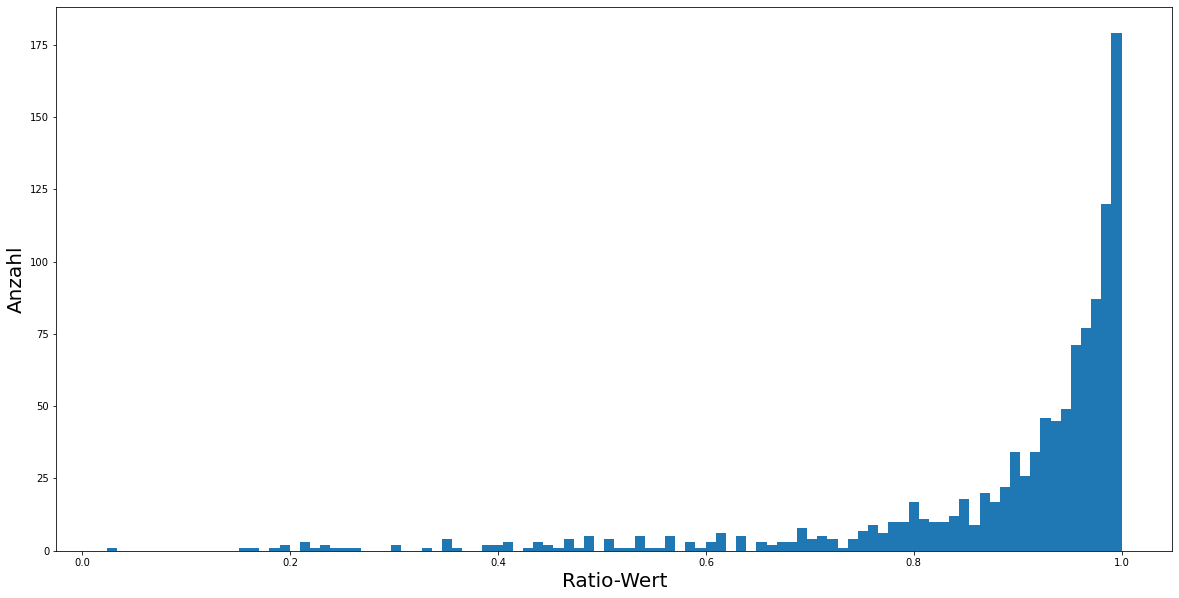

In [30]:
avg_ratio_ocr_ground_truth.plot(kind='hist',bins=100,figsize=(20,10))
plt.xlabel('Ratio-Wert', fontsize = 20)
plt.ylabel('Anzahl', fontsize = 20)
plt.show()

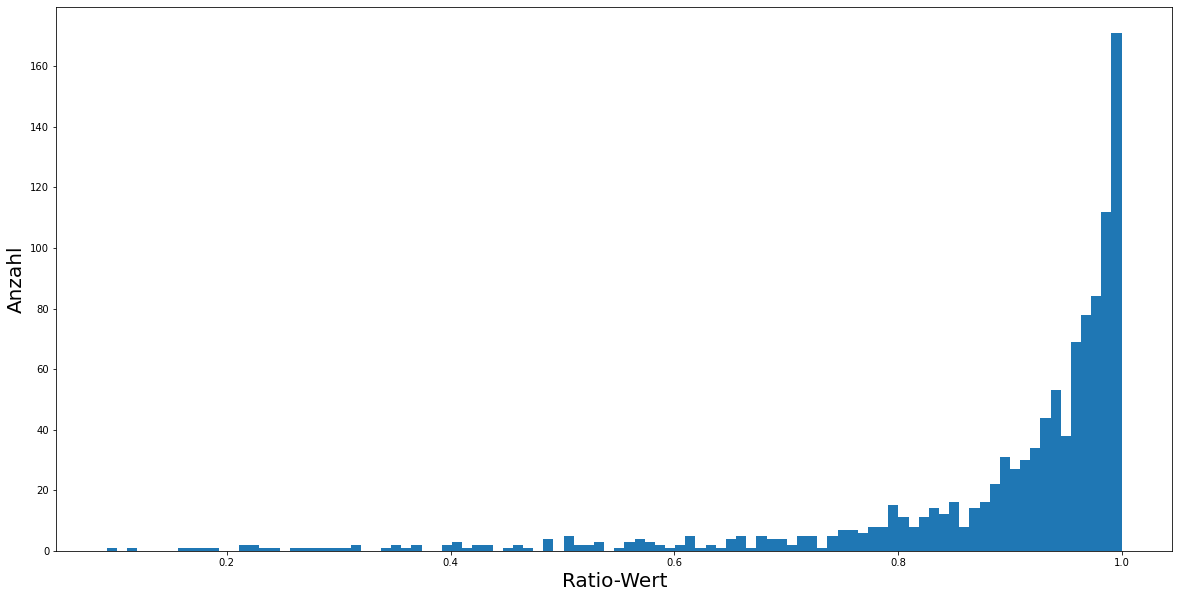

In [31]:
avg_ratio_ground_truth_ocr.plot(kind='hist',bins=100,figsize=(20,10))
plt.xlabel('Ratio-Wert', fontsize = 20)
plt.ylabel('Anzahl', fontsize = 20)
plt.show()

In [32]:
print("Mittelwert:")

print("OCR_ground_truth:",avg_ratio_ocr_ground_truth.mean())


print("Maximalwerte: ")
print("OCR_ground_truth:",avg_ratio_ocr_ground_truth.max())


print("Minimalwerte: ")
print("OCR_ground_truth:",avg_ratio_ocr_ground_truth.min())


Mittelwert:
OCR_ground_truth: 0.8917727048289199
Maximalwerte: 
OCR_ground_truth: 1.0
Minimalwerte: 
OCR_ground_truth: 0.023752969121140142


In [33]:
print("Mittelwert:")

print("OCR_ground_truth:",avg_ratio_ground_truth_ocr.mean())


print("Maximalwerte: ")
print("OCR_ground_truth:",avg_ratio_ground_truth_ocr.max())


print("Minimalwerte: ")
print("OCR_ground_truth:",avg_ratio_ground_truth_ocr.min())

Mittelwert:
OCR_ground_truth: 0.8912516525498324
Maximalwerte: 
OCR_ground_truth: 1.0
Minimalwerte: 
OCR_ground_truth: 0.09290953545232274


In [34]:
df_master.head()

,identifier,region_class,pub_id,pub_name,date,OCR_text,ground_truth_text,ground_truth_normalized,OCR_normalized,ratio_OCR_ground_truth,ratio_ground_truth_OCR,in ground_truth but not in OCR,symmetric difference in char,in OCR but not in ground_truth
0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,"Kutſcher\n\n7 d. —b um s\nI. Bachgaſſe 1,\n\n \n","Kutscher\npolizeilich geprüft, bittet um Poste...",kutscher polizeilich geprüft bittet um posten ...,kutscher um bachgasse,0.483516,0.483516,"{2, v, n, i, 0, 6, 7, o, x, l, z, p, f, ü}","{2, o, x, p, f, ü, v, n, i, 0, 6, 7, l, z}",{}
1,aze_19130917_12_OFFER_1,OFFER,aze,Arbeiter-Zeitung,1913,Einige jüngere\n\nUust-Girter\n\nfinden danern...,Einige jüngere\nLuster-Gürter\nfinden dauernde...,einige jüngere lustergürter finden dauernde be...,einige jüngere uustgirter finden danernde besc...,0.902256,0.902256,"{8, 0, 5, 7, p}","{p, 8, 0, 5, 7}",{}
2,aze_19130917_12_OFFER_2,OFFER,aze,Arbeiter-Zeitung,1913,Lehrmädchen\näum Kleidermachen wird aufgenomme...,Lehrmädchen\nzum Kleidermachen wird aufgenomme...,lehrmädchen zum kleidermachen wird aufgenommen...,lehrmädchen äum kleidermachen wird aufgenommen...,0.923913,0.923913,{z},{z},{}
3,aze_19130917_12_OFFER_3,OFFER,aze,Arbeiter-Zeitung,1913,Schneid erinnen E\n\nAusferti an und Kettlerin...,Schneiderinnen 1111\nAusfertigerinnen und Kett...,schneiderinnen 1111 ausfertigerinnen und kettl...,schneid erinnen ausferti an und kettlerinnen w...,0.937238,0.937238,{},{},{}
4,aze_19130917_12_OFFER_4,OFFER,aze,Arbeiter-Zeitung,1913,Als Wäſcherin\noder Bedienerin ſucht eine Frau...,Als Wäscherin\noder Bedienerin sucht eine Frau...,als wäscherin oder bedienerin sucht eine frau ...,als wäscherin oder bedienerin sucht eine frau ...,1.000000,1.000000,{},{},{}


### 7.1. Unterschiede der beiden Ratios

In [35]:
df_master["RatioDiff"] = df_master["ratio_OCR_ground_truth"] - df_master["ratio_ground_truth_OCR"]

ratio_diff = df_master["RatioDiff"]

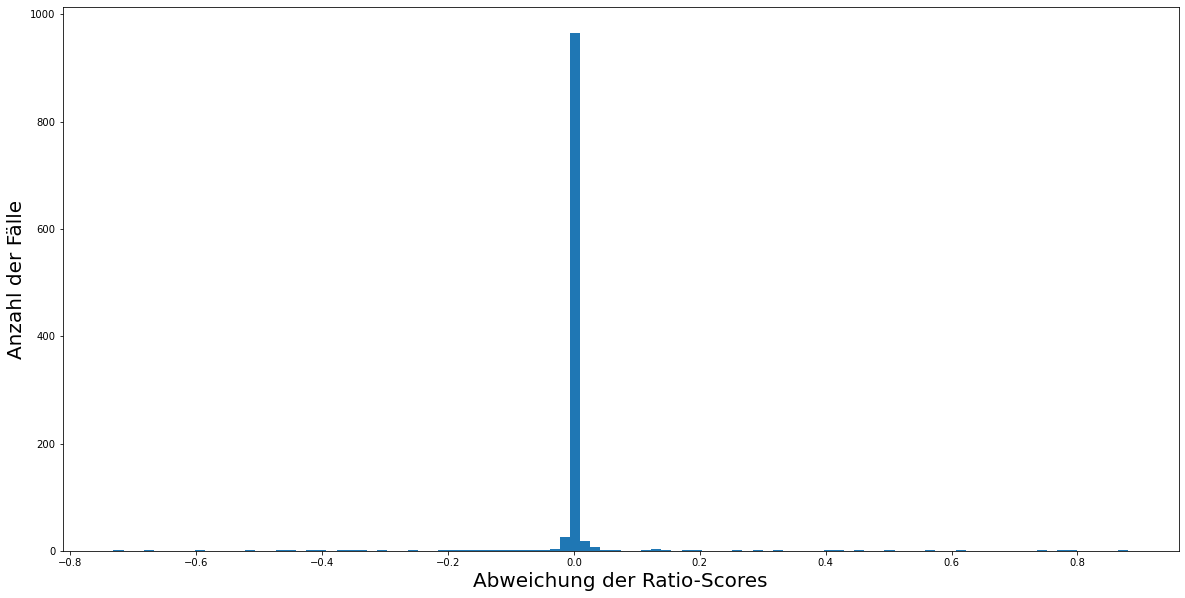

In [36]:
ratio_diff.plot(kind='hist',bins=100,figsize=(20,10))

plt.xlabel('Abweichung der Ratio-Scores', fontsize = 20)
plt.ylabel('Anzahl der Fälle', fontsize = 20)
plt.show()

In [37]:
df_master

,identifier,region_class,pub_id,pub_name,date,OCR_text,ground_truth_text,ground_truth_normalized,OCR_normalized,ratio_OCR_ground_truth,ratio_ground_truth_OCR,in ground_truth but not in OCR,symmetric difference in char,in OCR but not in ground_truth,RatioDiff
0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,"Kutſcher\n\n7 d. —b um s\nI. Bachgaſſe 1,\n\n \n","Kutscher\npolizeilich geprüft, bittet um Poste...",kutscher polizeilich geprüft bittet um posten ...,kutscher um bachgasse,0.483516,0.483516,"{2, v, n, i, 0, 6, 7, o, x, l, z, p, f, ü}","{2, o, x, p, f, ü, v, n, i, 0, 6, 7, l, z}",{},0.0
1,aze_19130917_12_OFFER_1,OFFER,aze,Arbeiter-Zeitung,1913,Einige jüngere\n\nUust-Girter\n\nfinden danern...,Einige jüngere\nLuster-Gürter\nfinden dauernde...,einige jüngere lustergürter finden dauernde be...,einige jüngere uustgirter finden danernde besc...,0.902256,0.902256,"{8, 0, 5, 7, p}","{p, 8, 0, 5, 7}",{},0.0
2,aze_19130917_12_OFFER_2,OFFER,aze,Arbeiter-Zeitung,1913,Lehrmädchen\näum Kleidermachen wird aufgenomme...,Lehrmädchen\nzum Kleidermachen wird aufgenomme...,lehrmädchen zum kleidermachen wird aufgenommen...,lehrmädchen äum kleidermachen wird aufgenommen...,0.923913,0.923913,{z},{z},{},0.0
3,aze_19130917_12_OFFER_3,OFFER,aze,Arbeiter-Zeitung,1913,Schneid erinnen E\n\nAusferti an und Kettlerin...,Schneiderinnen 1111\nAusfertigerinnen und Kett...,schneiderinnen 1111 ausfertigerinnen und kettl...,schneid erinnen ausferti an und kettlerinnen w...,0.937238,0.937238,{},{},{},0.0
4,aze_19130917_12_OFFER_4,OFFER,aze,Arbeiter-Zeitung,1913,Als Wäſcherin\noder Bedienerin ſucht eine Frau...,Als Wäscherin\noder Bedienerin sucht eine Frau...,als wäscherin oder bedienerin sucht eine frau ...,als wäscherin oder bedienerin sucht eine frau ...,1.000000,1.000000,{},{},{},0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,vtl_19041113_12_SEARCH_4,SEARCH,vtl,Das Vaterland,1904,Um Poſten als\nWirtſchafterin\noder Wäſcheverw...,Um Poſten als\nWirtſchafterin\noder Wäſcheverw...,um posten als wirtschafterin oder wäscheverwah...,um posten als wirtschafterin oder wäscheverwah...,1.000000,1.000000,{},{},{},0.0
1072,vtl_19041113_12_SEARCH_5,SEARCH,vtl,Das Vaterland,1904,"Tüchtige, gewiſſenhafte, in\nallem Häuslichen ...","Tüchtige, gewiſſenhafte, in\nallem Häuslichen ...",tüchtige gewissenhafte in allem häuslichen ver...,tüchtige gewissenhafte in allem häuslichen ver...,0.997555,0.997555,{},{},{},0.0
1073,vtl_19041113_12_SEARCH_6,SEARCH,vtl,Das Vaterland,1904,"Alleinſtehende Frau\n25 Jahre alt, in allen Ha...","Alleinſtehende Frau\n25 Jahre alt, in allen Ha...",alleinstehende frau 25 jahre alt in allen haus...,alleinstehende frau 25 jahre alt in allen haus...,0.984946,0.984946,{},{},{},0.0
1074,vtl_19041113_12_SEARCH_7,SEARCH,vtl,Das Vaterland,1904,"#le.\nReiſebegleiterin,\n\nGefellſchafterin\no...","Als.\nReiſebegleiterin,\nGefellſchafterin\node...",als reisebegleiterin gefellschafterin oder tag...,le reisebegleiterin gefellschafterin oder tag...,0.979592,0.979592,{},{},{},0.0


In [38]:
df_diffs = df_master[df_master.RatioDiff != 0]
len(df_diffs)

127

### 7.2. Suche nach Ausreißern im OCR Korpus

In [39]:
ratios = df_master["ratio_OCR_ground_truth"]

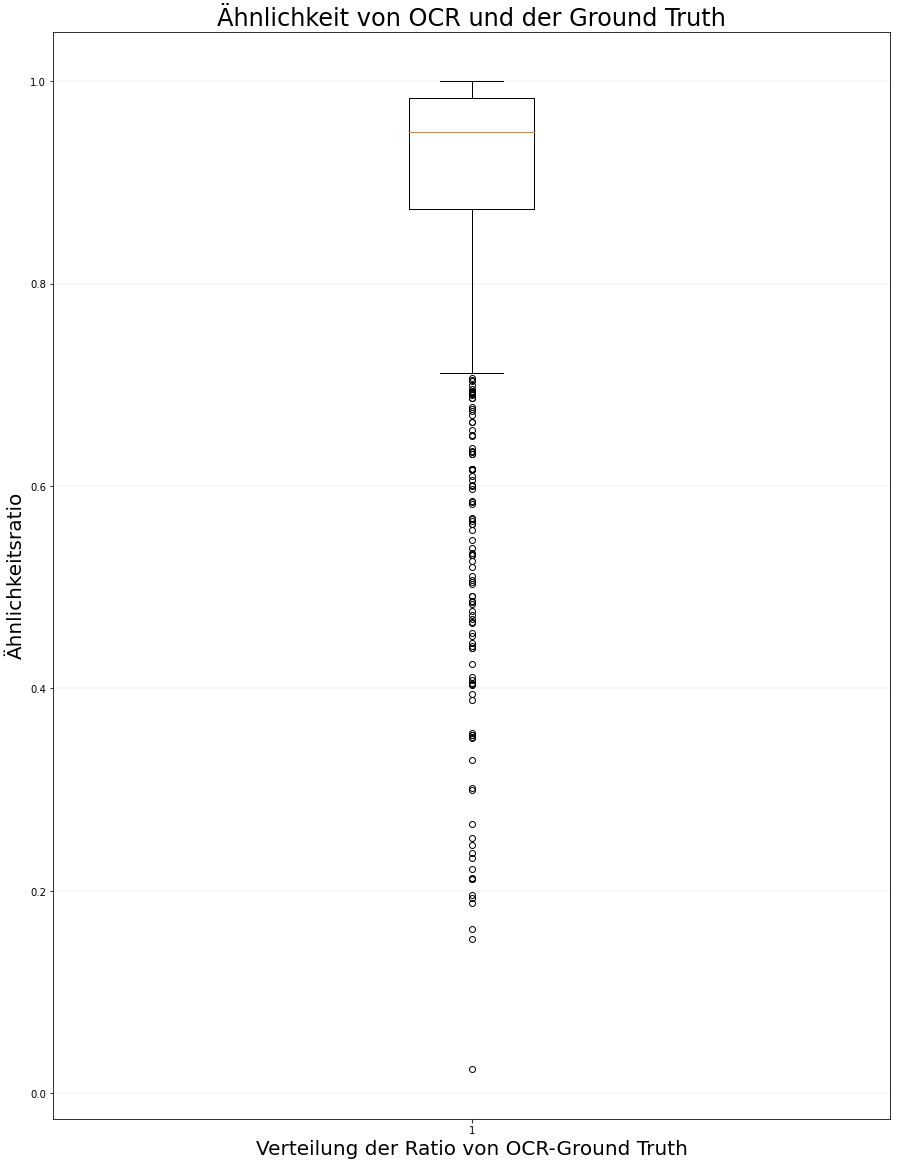

In [40]:
fig, ax = plt.subplots(figsize=(15, 20))

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Ähnlichkeit von OCR und der Ground Truth', fontsize = 24)
ax.set_xlabel('Verteilung der Ratio von OCR-Ground Truth', fontsize = 20)
ax.set_ylabel('Ähnlichkeitsratio', fontsize = 20)

ax.boxplot(ratios)
plt.show()

In [41]:
ratios.describe()

count    1076.000000
mean        0.891773
std         0.153298
min         0.023753
25%         0.873744
50%         0.950113
75%         0.983471
max         1.000000
Name: ratio_OCR_ground_truth, dtype: float64

man sieht, dass die OCR grundsätzlich gar nicht so schlecht ist. 
50% aller Stellenanzeigen haben eine Ratio von 0.95 und besser. 75% aller Stellenanzeigen haben eine Ratio von 0.87, was ebenfalls noch recht gut ist. 
Dies liegt nahe, dass der Großteil der OCR-Stellenanzeigen eigentlich recht gut bearbeitet werden können. 
Die 25% der Stellenanzeigen mit einer Ratio von 0.87 oder niedriger, sind recht heterogen verteilt, was man im Boxplot sehen kann. So liegen alle Outlier in diesem Quatil, ab eine Wert von ca. 0.75. 

Die Stellenanzeige mit dem niedrigsten Ratio-Score liegt bei 0.02 und ist als Outlier zu betrachten. Um den Datensatz besser zu verstehen, werden nun im Spezifischen die Outlier betrachtet

#### Outlier berechnen

In [42]:
Q1,Q3 = np.percentile(ratios , [25,75])
# Find IQR, upper limit, lower limit
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
# Find outliers
outliers = ratios[(ratios > ul) | (ratios < ll)]
outliers.describe()

count    106.000000
mean       0.498097
std        0.161810
min        0.023753
25%        0.404620
50%        0.528985
75%        0.631462
max        0.707071
Name: ratio_OCR_ground_truth, dtype: float64

#### Betrachtung der Outlier

In [43]:
df_ratio_outlier = df_master[df_master.ratio_OCR_ground_truth <= 0.715232]
ratios_outlier = df_ratio_outlier["ratio_OCR_ground_truth"]


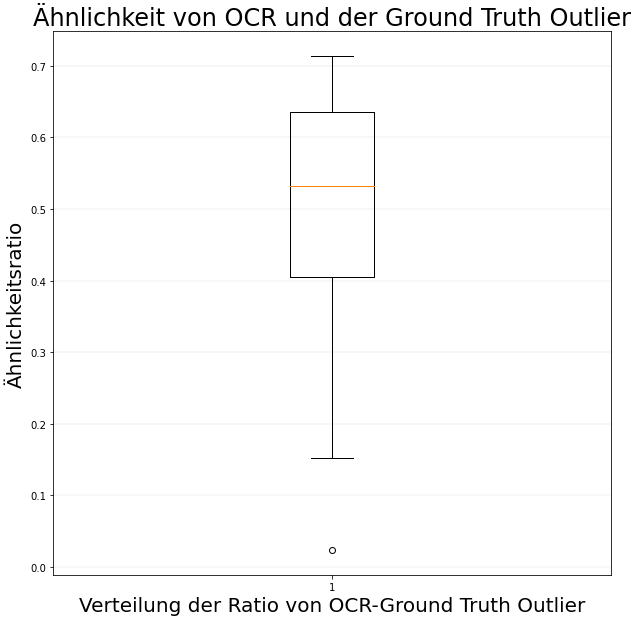

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Ähnlichkeit von OCR und der Ground Truth Outlier', fontsize = 24)
ax.set_xlabel('Verteilung der Ratio von OCR-Ground Truth Outlier', fontsize = 20)
ax.set_ylabel('Ähnlichkeitsratio', fontsize = 20)

ax.boxplot(ratios_outlier)
plt.show()

In [45]:
ratios_outlier.describe()

count    109.000000
mean       0.504008
std        0.163406
min        0.023753
25%        0.405714
50%        0.531915
75%        0.634921
max        0.713755
Name: ratio_OCR_ground_truth, dtype: float64

In [46]:
df_ratio_min = df_master[df_master.ratio_OCR_ground_truth < 0.4]
df_ratio_min = df_ratio_min[["ground_truth_normalized", "OCR_normalized", "ratio_OCR_ground_truth"]]
df_ratio_min.head()

,ground_truth_normalized,OCR_normalized,ratio_OCR_ground_truth
134,bis kronen täglicher verdienst durch uebernah...,bis kronen täglicher verdienst durch üebernah...,0.232381
155,tischlergehilfe auf weiche möbel wird aufgenom...,52 tischlergehilfe pse,0.351852
185,rucksackfabrik sucht zum sofortigen eintritt 1...,ruchs mruchksackfabrik sucht zum sofortigen ei...,0.221416
250,lehrling 1600 für das hutgewerbe wird gegen be...,lehrling iee,0.244898
263,junger kriegsinvalider mit vorzüglicher kaufmä...,zunger mriegsinbalider mit vorzüglicher kaufmä...,0.192593


In [47]:
df_ratio_min["ground_truth_normalized"].iloc[4]

'junger kriegsinvalider mit vorzüglicher kaufmännischer vorbildung und praxis in magazin kontor und expedit maschinschreiber sprachenkundig und erfahren in der papier und lebensmittelbranche sucht per sofort stelle gefl anträge unter tüchtig 7391 an die expedition schulerstraße 13 7391 '

In [48]:
df_ratio_min["OCR_normalized"].iloc[4]

'zunger mriegsinbalider mit vorzüglicher kaufmännischer lerdüdens und praxzis in makaun kontor und expedit kaschinschreiber sprachenkundig und ersahren in der papier und lebensmitteibranche sucht per sofort stelle gefl anträge unter 7301 an die schulerst '

In [49]:
df_ratio_min["ground_truth_normalized"].iloc[5]

'netter fabriksdiener wird aufgenommen und habig iv frankenberggasse 57 7450 '

In [50]:
df_ratio_min["OCR_normalized"].iloc[5]

' 258 ee imen vv '

# 

## 8. Auswertungen des symmetrischen Vergleichs

In [51]:
df_master.head()

,identifier,region_class,pub_id,pub_name,date,OCR_text,ground_truth_text,ground_truth_normalized,OCR_normalized,ratio_OCR_ground_truth,ratio_ground_truth_OCR,in ground_truth but not in OCR,symmetric difference in char,in OCR but not in ground_truth,RatioDiff
0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,"Kutſcher\n\n7 d. —b um s\nI. Bachgaſſe 1,\n\n \n","Kutscher\npolizeilich geprüft, bittet um Poste...",kutscher polizeilich geprüft bittet um posten ...,kutscher um bachgasse,0.483516,0.483516,"{2, v, n, i, 0, 6, 7, o, x, l, z, p, f, ü}","{2, o, x, p, f, ü, v, n, i, 0, 6, 7, l, z}",{},0.0
1,aze_19130917_12_OFFER_1,OFFER,aze,Arbeiter-Zeitung,1913,Einige jüngere\n\nUust-Girter\n\nfinden danern...,Einige jüngere\nLuster-Gürter\nfinden dauernde...,einige jüngere lustergürter finden dauernde be...,einige jüngere uustgirter finden danernde besc...,0.902256,0.902256,"{8, 0, 5, 7, p}","{p, 8, 0, 5, 7}",{},0.0
2,aze_19130917_12_OFFER_2,OFFER,aze,Arbeiter-Zeitung,1913,Lehrmädchen\näum Kleidermachen wird aufgenomme...,Lehrmädchen\nzum Kleidermachen wird aufgenomme...,lehrmädchen zum kleidermachen wird aufgenommen...,lehrmädchen äum kleidermachen wird aufgenommen...,0.923913,0.923913,{z},{z},{},0.0
3,aze_19130917_12_OFFER_3,OFFER,aze,Arbeiter-Zeitung,1913,Schneid erinnen E\n\nAusferti an und Kettlerin...,Schneiderinnen 1111\nAusfertigerinnen und Kett...,schneiderinnen 1111 ausfertigerinnen und kettl...,schneid erinnen ausferti an und kettlerinnen w...,0.937238,0.937238,{},{},{},0.0
4,aze_19130917_12_OFFER_4,OFFER,aze,Arbeiter-Zeitung,1913,Als Wäſcherin\noder Bedienerin ſucht eine Frau...,Als Wäscherin\noder Bedienerin sucht eine Frau...,als wäscherin oder bedienerin sucht eine frau ...,als wäscherin oder bedienerin sucht eine frau ...,1.000000,1.000000,{},{},{},0.0


In [52]:
df_differences = df_master[["in ground_truth but not in OCR", "symmetric difference in char", "in OCR but not in ground_truth"]]
df_differences["ground_truth_only"] = df_differences["in ground_truth but not in OCR"].map(list)
df_differences["OCR_only"] = df_differences["in OCR but not in ground_truth"].map(list)
df_differences["symDiff"] = df_differences["symmetric difference in char"].map(list)
df_differences.head()

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5498/2026844116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_differences["ground_truth_only"] = df_differences["in ground_truth but not in OCR"].map(list)
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5498/2026844116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_differences["OCR_only"] = df_differences["in OCR but not in ground_truth"].map(list)
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5498/202684411

,in ground_truth but not in OCR,symmetric difference in char,in OCR but not in ground_truth,ground_truth_only,OCR_only,symDiff
0,"{2, v, n, i, 0, 6, 7, o, x, l, z, p, f, ü}","{2, o, x, p, f, ü, v, n, i, 0, 6, 7, l, z}",{},"[2, v, n, i, 0, 6, 7, o, x, l, z, p, f, ü]",[],"[2, o, x, p, f, ü, v, n, i, 0, 6, 7, l, z]"
1,"{8, 0, 5, 7, p}","{p, 8, 0, 5, 7}",{},"[8, 0, 5, 7, p]",[],"[p, 8, 0, 5, 7]"
2,{z},{z},{},[z],[],[z]
3,{},{},{},[],[],[]
4,{},{},{},[],[],[]


### 8.1. Auswertung symmetrische Differenz

In [53]:
symdiff = df_differences["symDiff"]
list_symdiff = flatten_list(symdiff)

char_counter_symdiff = {}
for char in list_symdiff:
    if char in char_counter_symdiff:
        char_counter_symdiff[char] += 1
    else:
        char_counter_symdiff[char] = 1

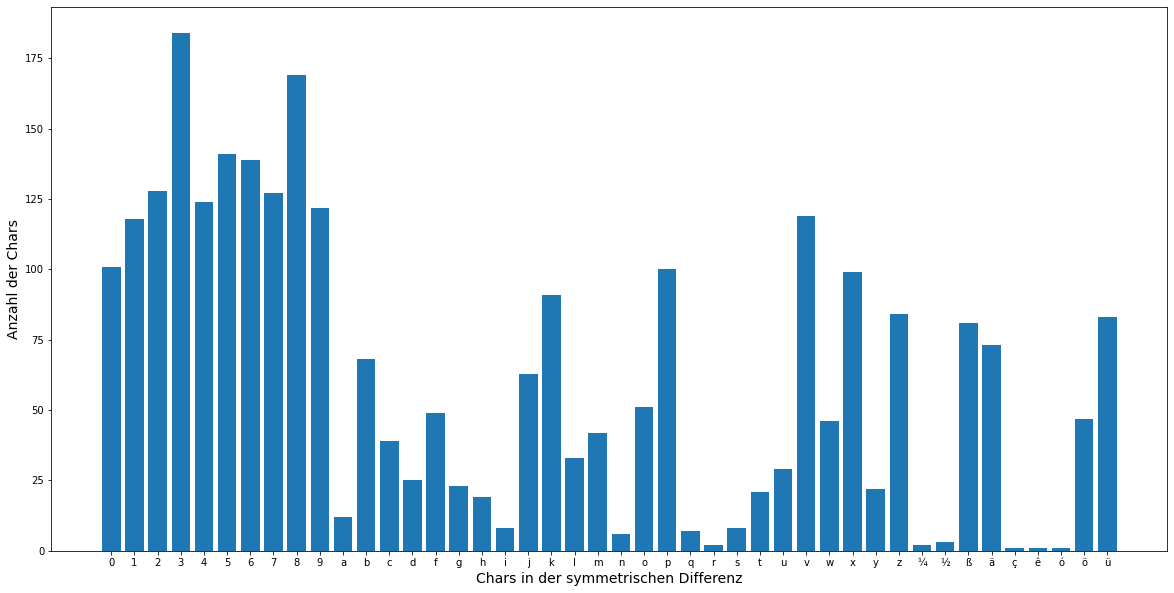

In [54]:
lst_symdiff = sorted(char_counter_symdiff.items())
x, y = zip(*lst_symdiff) # unpack a list of pairs into two tuples
plt.figure(figsize=(20, 10))
plt.bar(x, y)
plt.xlabel('Chars in der symmetrischen Differenz', fontsize = 14)
plt.ylabel('Anzahl der Chars', fontsize = 14)
plt.show()

### 8.2. Auswertung Ground Truth - OCR

In [55]:
ground_truth_only = df_differences["ground_truth_only"]
list_ground_truth_only = flatten_list(ground_truth_only)
char_counter_ground_truth = {}
for char in list_ground_truth_only:
    if char in char_counter_ground_truth:
        char_counter_ground_truth[char] += 1
    else:
        char_counter_ground_truth[char] = 1

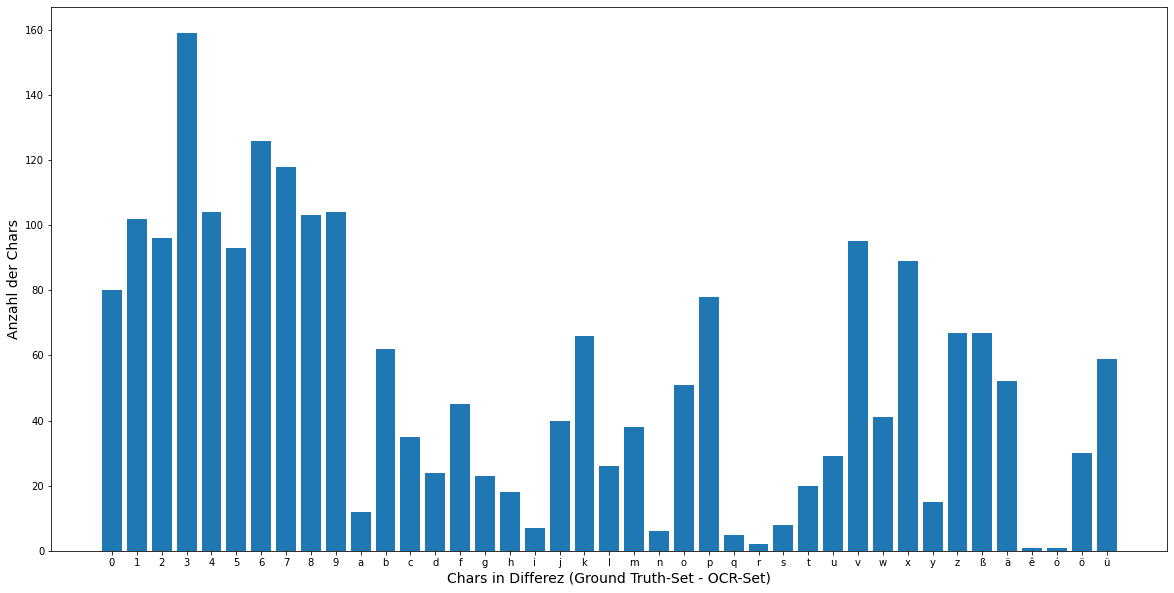

In [56]:
list_ground_truth_only = sorted(char_counter_ground_truth.items())
x, y = zip(*list_ground_truth_only) # unpack a list of pairs into two tuples
plt.figure(figsize=(20, 10))
plt.bar(x, y)
plt.xlabel('Chars in Differez (Ground Truth-Set - OCR-Set)', fontsize = 14)
plt.ylabel('Anzahl der Chars', fontsize = 14)
plt.show()

### 8.3. Auswertung OCR - Ground Truth

In [57]:
ocr_only = df_differences["OCR_only"]
list_ocr_only = flatten_list(ocr_only)
char_counter_ocr = {}
for char in list_ocr_only:
    if char in char_counter_ocr:
        char_counter_ocr[char] += 1
    else:
        char_counter_ocr[char] = 1

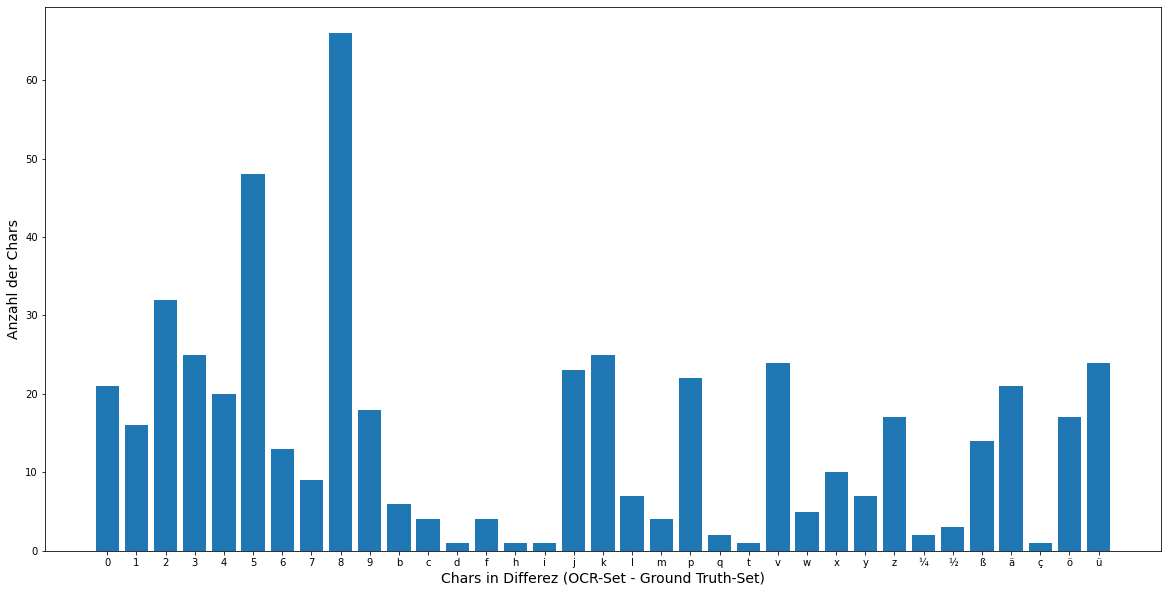

In [58]:
list_ocr_only = sorted(char_counter_ocr.items())
x, y = zip(*list_ocr_only) # unpack a list of pairs into two tuples
plt.figure(figsize=(20, 10))
plt.bar(x, y)
plt.xlabel('Chars in Differez (OCR-Set - Ground Truth-Set)', fontsize = 14)
plt.ylabel('Anzahl der Chars', fontsize = 14)
plt.show()

## 9. Export

In [59]:
#export normalized text with difflib ratio, symmetric difference
df_master.to_csv(r"../output/3.3_ocr_ground_truth_vergleich/difference_output_normalized_corpus.csv")

#export unnormalized korpus of OCR and Ground Truth
df_ocr_ground_truth.to_csv(r"../output/3.3_ocr_ground_truth_vergleich/ocr_ground_truth_unnormalized.csv")